# Data Preprocessing

# Data and Library Importing

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sm
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from IPython.display import Image
import pydotplus
plt.style.use('dark_background')

In [94]:
# Load the data using pandas library
# Importing Rainfall prediction case study file and header 0 as data starts from 0

df = pd.read_csv('C:/Users/SUHITA SREE KOLLI/Downloads/sydney_rain prediction.csv', header=0)

In [95]:
# shows first five rows of dataframe
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [97]:
df['Date']=pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['year']=df.Date.dt.year
df['month']=df.Date.dt.month
df['day']=df.Date.dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

# Ploting the Data

<Axes: ylabel='count'>

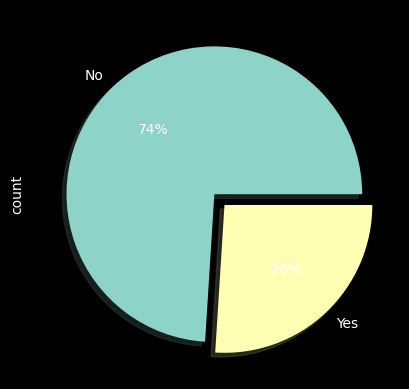

In [98]:
df['RainToday'].value_counts().plot(kind='pie',shadow=True,autopct='%.0f%%',explode=(0,0.1))

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

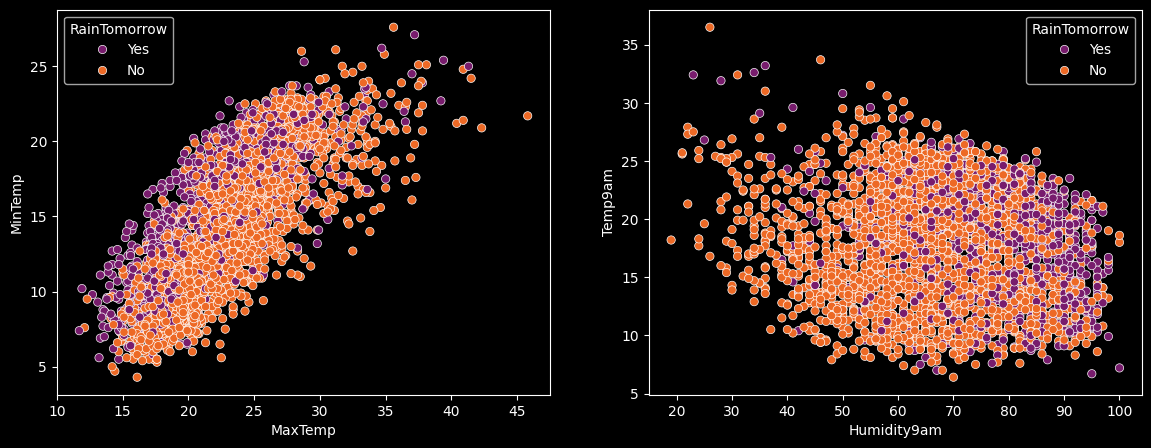

<Figure size 400x400 with 0 Axes>

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
plt.figure(figsize = (4,4))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df, ax=ax1)
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df, ax=ax2)

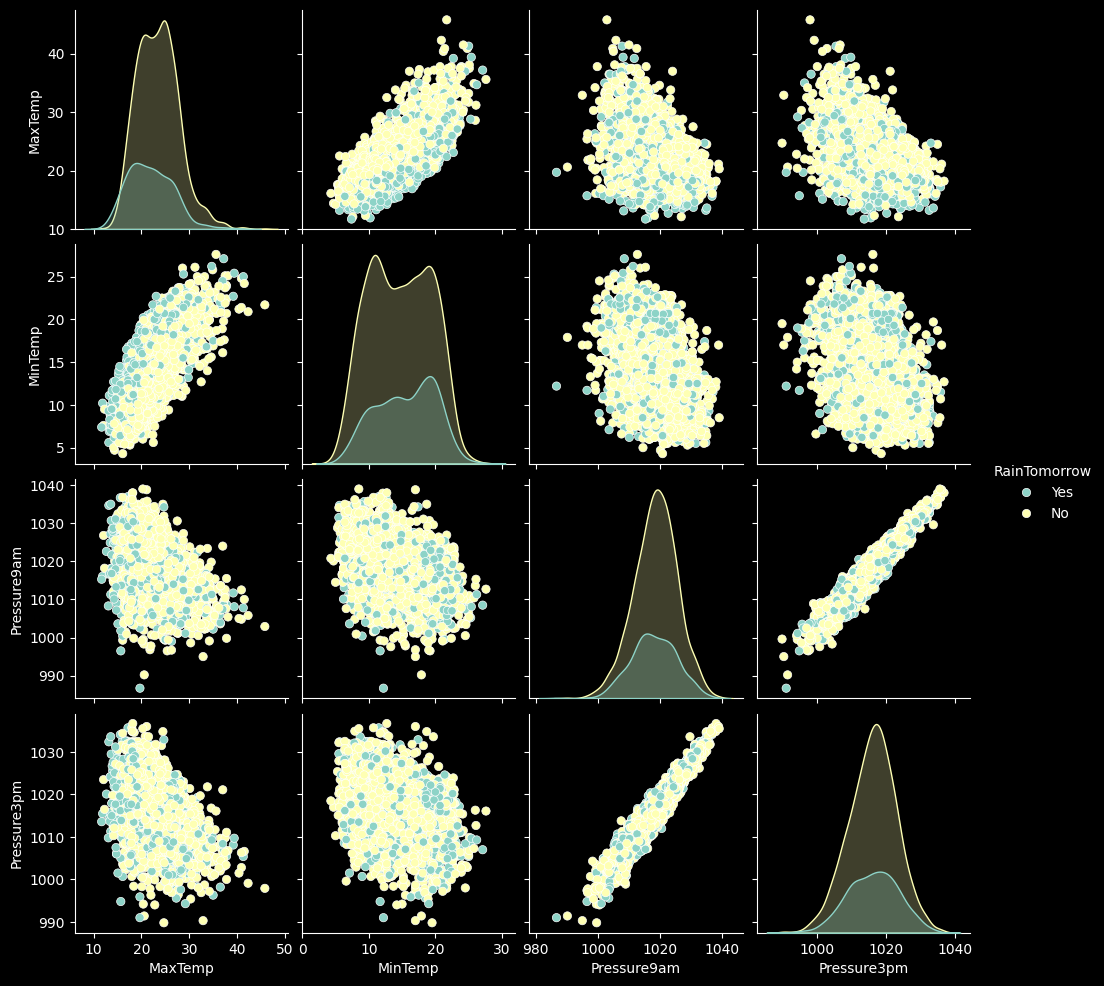

In [100]:
sns.pairplot(data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow')
plt.show()

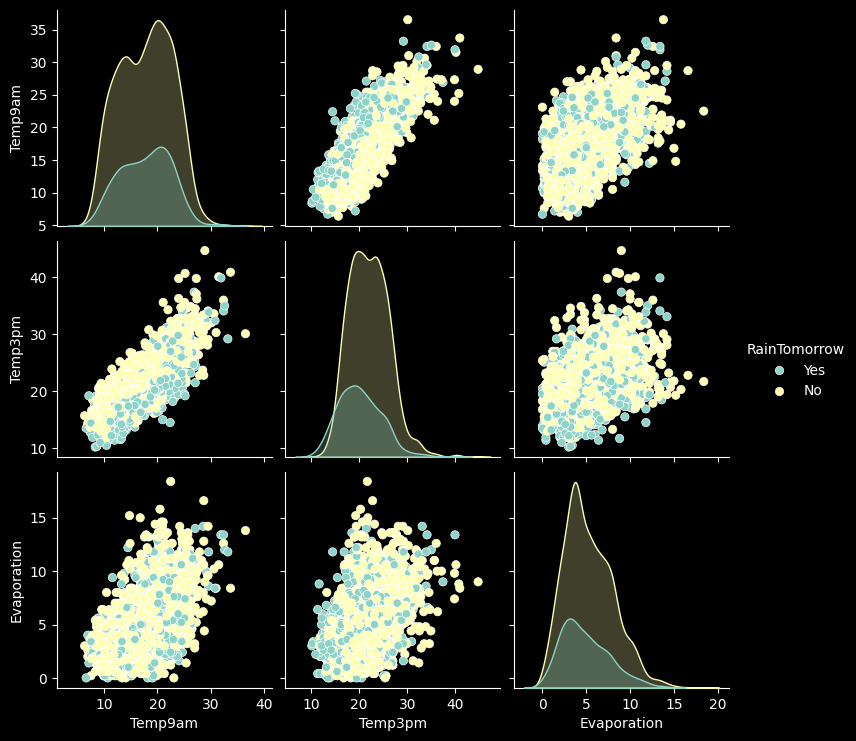

In [101]:
sns.pairplot(data=df, vars=('Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow')
plt.show()

[]

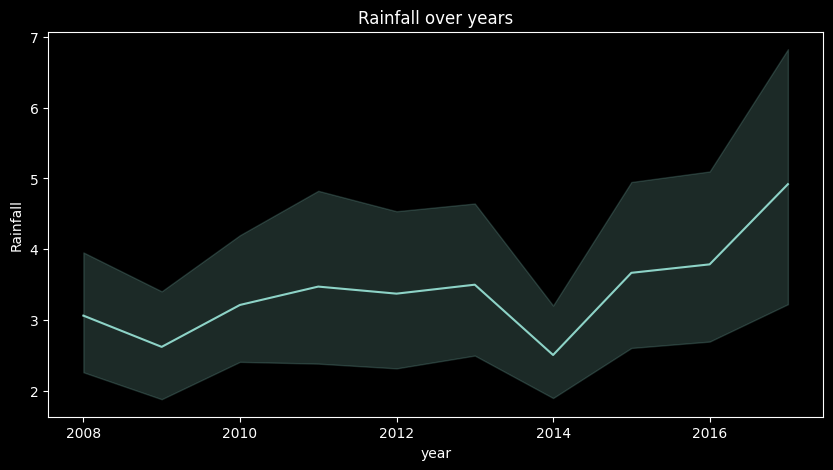

In [102]:

plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='year',y='Rainfall')
plt.title('Rainfall over years')
plt.plot()

# Checking for Missing Data

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [104]:
df = df.drop(["Date","Location","year","month","day"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [105]:
# Fill missing numerical values with the mean
df.MinTemp= df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp= df.MaxTemp.fillna(df.MaxTemp.mean())
df.Rainfall= df.Rainfall.fillna(df.Rainfall.mean())
df.Evaporation= df.Evaporation.fillna(df.Evaporation.mean())
df.Sunshine= df.Sunshine.fillna(df.Sunshine.mean())
df.Humidity9am= df.Humidity9am.fillna(df.Humidity9am.mean())
df.Humidity3pm= df.Humidity3pm.fillna(df.Humidity3pm.mean())
df.Pressure9am= df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm= df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Cloud9am= df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm= df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Temp9am= df.Temp9am.fillna(df.Temp9am.mean())
df.Temp3pm= df.Temp3pm.fillna(df.Temp3pm.mean())

# Fill missing categorical values with mode
df.RainToday= df.RainToday.fillna(df.RainToday.mode())

# checking for updated data after filling full values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3337 non-null   float64
 1   MaxTemp       3337 non-null   float64
 2   Rainfall      3337 non-null   float64
 3   Evaporation   3337 non-null   float64
 4   Sunshine      3337 non-null   float64
 5   Humidity9am   3337 non-null   float64
 6   Humidity3pm   3337 non-null   float64
 7   Pressure9am   3337 non-null   float64
 8   Pressure3pm   3337 non-null   float64
 9   Cloud9am      3337 non-null   float64
 10  Cloud3pm      3337 non-null   float64
 11  Temp9am       3337 non-null   float64
 12  Temp3pm       3337 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


In [106]:
# deleting the missing rows of RainToday
df = df.dropna(subset=['RainToday'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3331 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3331 non-null   float64
 1   MaxTemp       3331 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3331 non-null   float64
 4   Sunshine      3331 non-null   float64
 5   Humidity9am   3331 non-null   float64
 6   Humidity3pm   3331 non-null   float64
 7   Pressure9am   3331 non-null   float64
 8   Pressure3pm   3331 non-null   float64
 9   Cloud9am      3331 non-null   float64
 10  Cloud3pm      3331 non-null   float64
 11  Temp9am       3331 non-null   float64
 12  Temp3pm       3331 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3331 non-null   object 
dtypes: float64(13), object(2)
memory usage: 416.4+ KB


# Checking for Outliers

In [108]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.863613,22.997029,3.330231,5.185428,7.173663,68.256141,54.717229,1018.349031,1016.021750,4.182587,4.218557,17.814674,21.528680
std,4.552071,4.488817,9.895172,2.755999,3.802596,15.043902,16.260795,6.997672,7.005448,2.506658,2.411407,4.891371,4.299054
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.100000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.500000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


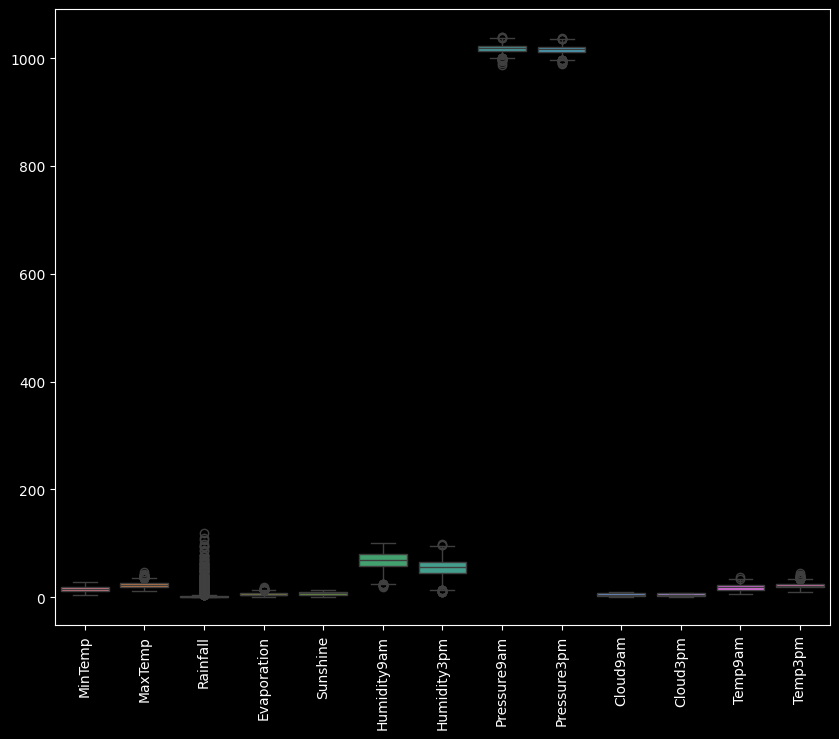

In [109]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Rainfall'>

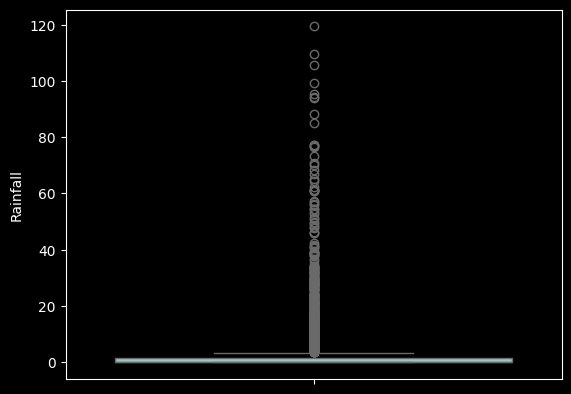

In [110]:
sns.boxplot(y="Rainfall", data=df)

In [111]:
import pandas as pd

# Calculate IQR for the 'rainfall' column
Q1 = df['Rainfall'].quantile(0.25)
Q3 = df['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping/flooring outliers in the 'rainfall' column
df['Rainfall'] = df['Rainfall'].clip(lower=lower_bound, upper=upper_bound)

# Filter out all outliers in the entire dataframe
# Uncomment the next line if you want to filter out rows with any outliers in any column
# df_no_outliers = df[~((df < (df.quantile(0.25) - 1.5 * (df.quantile(0.75) - df.quantile(0.25)))) | (df > (df.quantile(0.75) + 1.5 * (df.quantile(0.75) - df.quantile(0.25))))).any(axis=1)]

# If you want to see the effect of capping
original_stats = df.describe()
capped_stats = df.describe()

original_stats.loc[:, ['Rainfall']], capped_stats.loc[:, ['Rainfall']]

(          Rainfall
 count  3331.000000
 mean      0.864485
 std       1.390948
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       1.400000
 max       3.500000,
           Rainfall
 count  3331.000000
 mean      0.864485
 std       1.390948
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       1.400000
 max       3.500000)

<Axes: ylabel='Rainfall'>

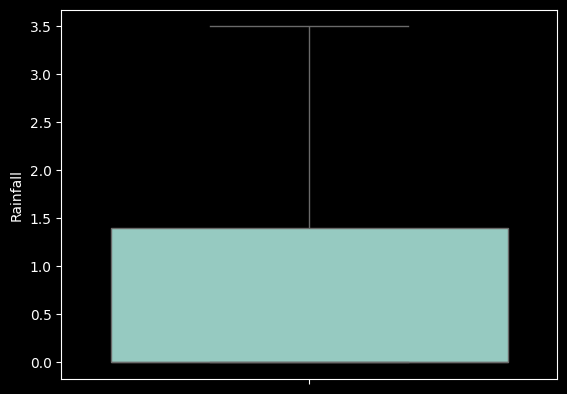

In [112]:
sns.boxplot(y="Rainfall", data=df)

# Dummy Variables

In [113]:
# Exclude the Date column when creating dummies
df = pd.get_dummies(df, columns=['RainToday','RainTomorrow'],drop_first=True).astype(int)

# Viewing data
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19,22,3,6,0,92,84,1017,1017,8,8,20,20,1,1
1,19,25,3,3,2,83,73,1017,1016,7,7,22,24,1,1
2,21,24,3,2,0,88,86,1016,1015,7,8,23,23,1,1
3,20,22,3,2,0,83,90,1014,1011,8,8,21,20,1,1
4,19,25,3,5,0,88,74,1008,1004,8,8,22,25,1,1


# Correlation Matrix

In [114]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.769026,0.019536,0.562371,-0.057982,0.052118,0.268997,-0.394281,-0.355583,0.234224,0.161507,0.935449,0.750568,0.017398,0.077969
MaxTemp,0.769026,1.000000,-0.181979,0.504666,0.325056,-0.185350,-0.150940,-0.386220,-0.419975,-0.085885,-0.100605,0.855778,0.955919,-0.186775,-0.150915
Rainfall,0.019536,-0.181979,1.000000,-0.227492,-0.367295,0.411649,0.347592,-0.010731,0.048744,0.322004,0.257815,-0.071804,-0.185393,0.954088,0.352522
Evaporation,0.562371,0.504666,-0.227492,1.000000,0.178538,-0.392741,-0.101672,-0.341820,-0.295439,-0.037736,-0.037930,0.599255,0.469948,-0.230689,-0.065918
Sunshine,-0.057982,0.325056,-0.367295,0.178538,1.000000,-0.488384,-0.577528,-0.047056,-0.095820,-0.657141,-0.673052,0.118214,0.342922,-0.365573,-0.519156
Humidity9am,0.052118,-0.185350,0.411649,-0.392741,-0.488384,1.000000,0.657527,0.262790,0.249656,0.421529,0.329353,-0.145864,-0.153478,0.400288,0.330758
Humidity3pm,0.268997,-0.150940,0.347592,-0.101672,-0.577528,0.657527,1.000000,0.153750,0.181636,0.451835,0.469119,0.129936,-0.211416,0.342724,0.472628
Pressure9am,-0.394281,-0.386220,-0.010731,-0.341820,-0.047056,0.262790,0.153750,1.000000,0.958985,-0.011658,-0.039111,-0.418946,-0.344792,-0.000515,-0.032924
Pressure3pm,-0.355583,-0.419975,0.048744,-0.295439,-0.095820,0.249656,0.181636,0.958985,1.000000,0.018761,-0.000995,-0.402852,-0.389460,0.056300,0.011180
Cloud9am,0.234224,-0.085885,0.322004,-0.037736,-0.657141,0.421529,0.451835,-0.011658,0.018761,1.000000,0.609999,0.087856,-0.087219,0.315695,0.329566


In [115]:
df.shape

(3331, 15)

# X-y Split

In [116]:
x_multi = df.loc[:, df.columns !="RainTomorrow_Yes"]
y_multi = df['RainTomorrow_Yes']

In [117]:
print(x_multi.shape, y_multi.shape)

(3331, 14) (3331,)


# Test-Train-Split

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi ,test_size=0.2,random_state=0)

In [120]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2664, 14) (667, 14) (2664,) (667,)


# Model Engineering

# Model_1: Multiple Logisctic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
clf_lrs_multi = LogisticRegression()
clf_lrs_multi.fit(x_multi,y_multi)

C:\Users\SUHITA SREE KOLLI\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
clf_lrs_multi.coef_

array([[-0.11929893,  0.10396307,  0.26055026,  0.03073954, -0.22867207,
         0.0070021 ,  0.04916122, -0.09674185,  0.09256938, -0.12369042,
         0.18579114,  0.04917244, -0.0386949 ,  0.08911266]])

In [123]:
clf_lrs_multi.intercept_

array([0.00093819])

In [124]:
import statsmodels.api as sn
x_cons_multi = sn.add_constant(x_multi)

In [125]:
logit_multi = sm.Logit(y_multi,x_cons_multi).fit()

Optimization terminated successfully.
         Current function value: 0.380954
         Iterations 7


In [126]:
logit_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3331
Model:                          Logit   Df Residuals:                     3316
Method:                           MLE   Df Model:                           14
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.3341
Time:                        14:22:59   Log-Likelihood:                -1269.0
converged:                       True   LL-Null:                       -1905.6
Covariance Type:            nonrobust   LLR p-value:                2.886e-263
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.6282      8.492      3.724      0.000      14.984      48.273
MinTemp          -0.2129      0.045     -4.726      0.000      -0.301      -0.125
MaxTemp           0.0782      0.041      1.907      0.056      -0.002       0.158
Rainfall          0.2508      0.121      2.066      0.039       0.013       0.489
Evaporation       0.0606      0.025      2.418      0.016       0.011       0.110
Sunshine         -0.2260      0.023    -10.023      0.000      -0.270      -0.182
Humidity9am       0.0136      0.007      2.007      0.045       0.000       0.027
Humidity3pm       0.0508      0.007      7.548      0.000       0.038       0.064
Pressure9am      -0.1126      0.030     -3.723      0.000      -0.172      -0.053
Pressure3pm       0.0772      0.029      2.651      0.008       0.020       0.134
Cloud9am         -0.0825      0.030     -2.743      0.006      -0.142      -0.024
Cloud3pm          0.1471      0.031      4.692      0.000       0.086       0.209
Temp9am           0.1249      0.048      2.579      0.010       0.030       0.220
Temp3pm          -0.0374      0.048     -0.786      0.432      -0.131       0.056
RainToday_Yes     0.1600      0.334      0.480      0.631      -0.494       0.814
=================================================================================
"""

# Roc Curve and Confussion Matrix

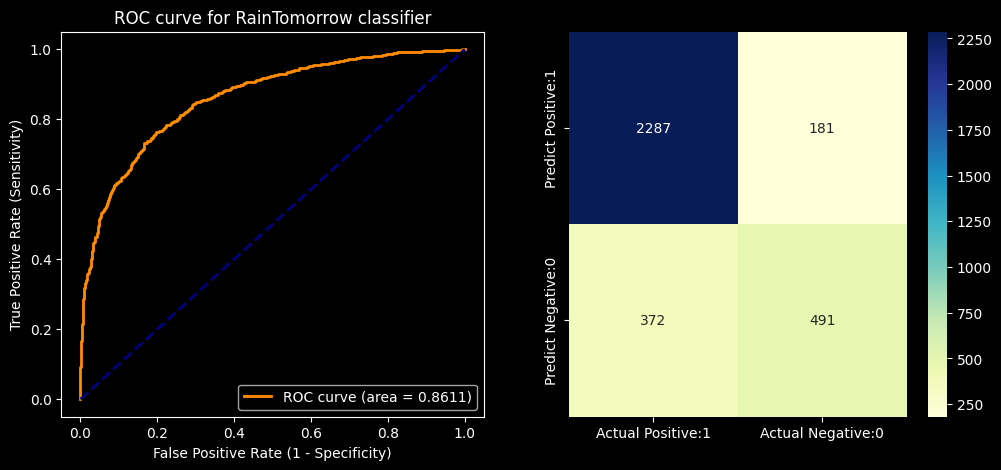

In [127]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_lrs1 = (clf_lrs_multi.predict_proba(x_multi)[:,1])
y_pred_lrs1 = y_pred_lrs1.reshape(-1,1)
fper, tper, _ = roc_curve(y_multi, y_pred_lrs1, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_lrs = confusion_matrix(y_multi, clf_lrs_multi.predict(x_multi))
cm_matrix_lrs = pd.DataFrame(data=cm_lrs, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_lrs, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

# Performance Metrics

Precision = True Positives/True Positives + False Positives

Recall     = True Positives/True Positives + False Negatives

AUC(ROC)




In [128]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [129]:
precision_score(y_multi, clf_lrs_multi.predict(x_multi))

np.float64(0.7306547619047619)

In [130]:
recall_score(y_multi, clf_lrs_multi.predict(x_multi))

np.float64(0.5689455388180765)

In [131]:
roc_auc_score(y_multi, clf_lrs_multi.predict(x_multi))

np.float64(0.7478034014998001)

In [132]:
y_pred_lrs = clf_lrs_multi.predict(x_multi)

acc_lrs = accuracy_score(y_multi, y_pred_lrs)
f1_lrs = f1_score(y_multi, y_pred_lrs, average='weighted')
roc_lrs = roc_auc_score(y_multi, y_pred_lrs1)

print('Accuracy: ', acc_lrs,'\nF1 Score: ', f1_lrs, '\nAUC(ROC): ', roc_lrs )
print("Classification Report: ")
print(classification_report(y_multi, y_pred_lrs))

Accuracy:  0.8339837886520565 
F1 Score:  0.8267474563681646 
AUC(ROC):  0.8610849229347701
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2468
           1       0.73      0.57      0.64       863

    accuracy                           0.83      3331
   macro avg       0.80      0.75      0.77      3331
weighted avg       0.83      0.83      0.83      3331



# Model2-Linear Discriminant Analysis

In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(x_multi, y_multi)

LinearDiscriminantAnalysis()

In [134]:
y_pred_lda = clf_lda.predict(x_multi)
y_pred_lda1 = (clf_lda.predict_proba(x_multi)[:,1])
y_pred_lda1 = y_pred_lda1.reshape(-1,1)

acc_lda = accuracy_score(y_multi, y_pred_lda)
f1_lda = f1_score(y_multi, y_pred_lda, average='weighted')
roc_lda = roc_auc_score(y_multi, y_pred_lda1)

print('Accuracy: ', acc_lda,'\nF1 Score: ', f1_lda, '\nAUC(ROC): ', roc_lda)
print("Classification Report: ")
print(classification_report(y_multi, y_pred_lda))

Accuracy:  0.8333833683578505 
F1 Score:  0.8280368932730553 
AUC(ROC):  0.861215915984157
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2468
           1       0.72      0.59      0.65       863

    accuracy                           0.83      3331
   macro avg       0.79      0.76      0.77      3331
weighted avg       0.83      0.83      0.83      3331



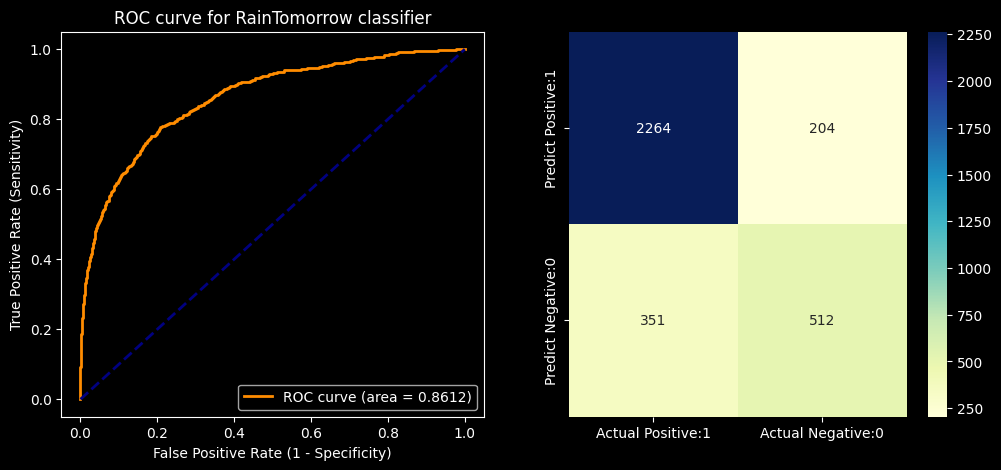

In [135]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_lda1 = (clf_lda.predict_proba(x_multi)[:,1])
y_pred_lda1 = y_pred_lda1.reshape(-1,1)
fper, tper, _ = roc_curve(y_multi, y_pred_lda1, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_lda = confusion_matrix(y_multi, clf_lda.predict(x_multi))
cm_matrix_lda = pd.DataFrame(data=cm_lda, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_lda, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

# Model3- K-nn

In [136]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(x_train)
x_train_s= scaler1.transform(x_train)

In [137]:
scaler2 = preprocessing.StandardScaler().fit(x_test)
x_test_s= scaler2.transform(x_test)

# KNN With n_neighbors = 1

In [138]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

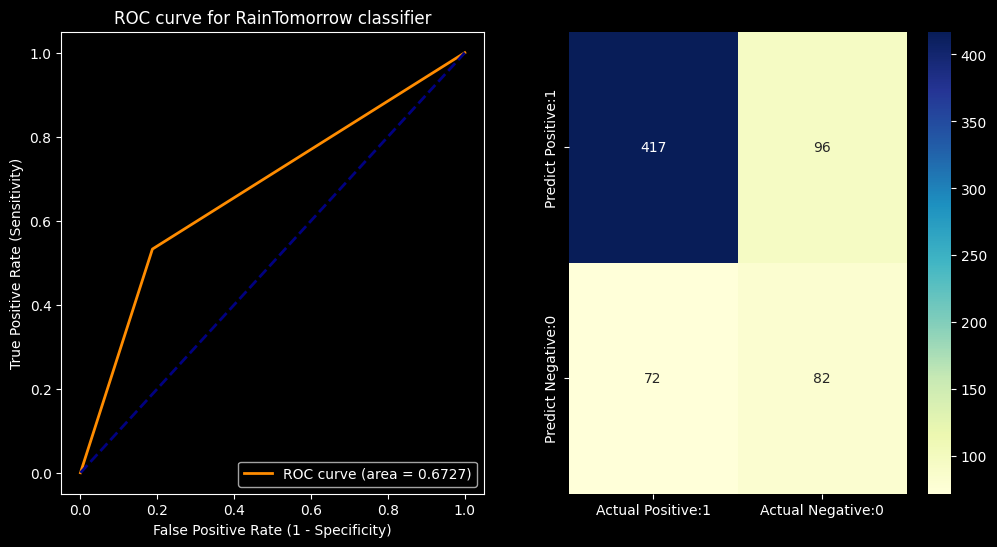

In [139]:
# plot ROC Curve
y_pred_knn1_1 = (clf_knn_1.predict_proba(x_test_s)[:,1])
fper, tper, _ = roc_curve(y_test, y_pred_knn1_1, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_knn1 = confusion_matrix(y_test, clf_knn_1.predict(x_test_s))
cm_matrix_knn1 = pd.DataFrame(data=cm_knn1, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_knn1, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

In [140]:
# Trainng data 
acc_train_knn1 = accuracy_score(y_train, clf_knn_1.predict(x_train_s))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_knn1)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_knn1 = clf_knn_1.predict(x_test_s)

acc_knn1 = accuracy_score(y_test, y_pred_knn1)
f1_knn1 = f1_score(y_test, y_pred_knn1, average='weighted')
roc_knn1 = roc_auc_score(y_test, y_pred_knn1)

print('Accuracy: ', acc_knn1,'\nF1 Score: ', f1_knn1, '\nAUC(ROC): ', roc_knn1)
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn1))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.7481259370314842 
F1 Score:  0.7542133629815927 
AUC(ROC):  0.6726665147717779
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       513
           1       0.46      0.53      0.49       154

    accuracy                           0.75       667
   macro avg       0.66      0.67      0.66       667
weighted avg       0.76      0.75      0.75       667



# KNN With n_neighbors = 3

In [141]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

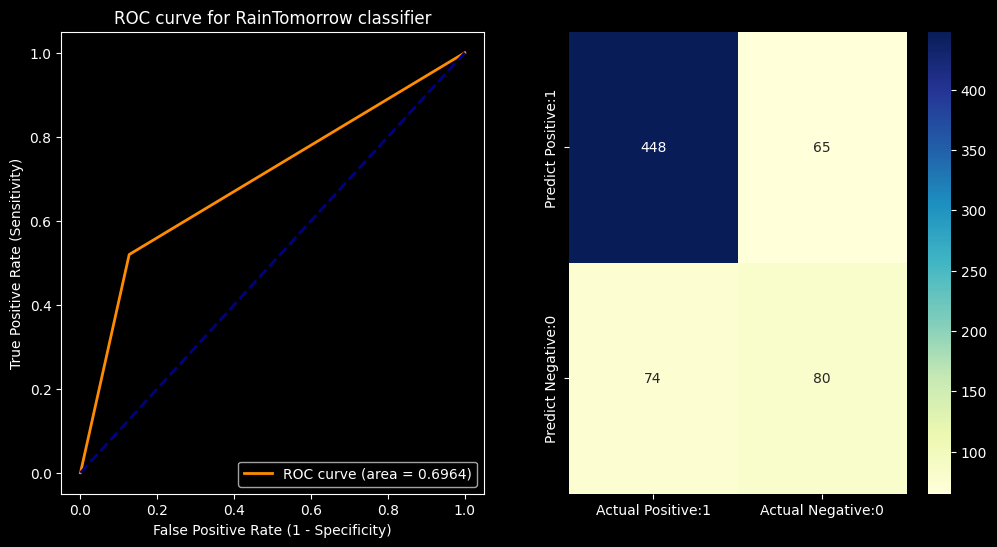

In [142]:
# plot ROC Curve
prob = clf_knn_3.predict(x_test_s)
fper, tper, _ = roc_curve(y_test, prob)
auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_knn3 = confusion_matrix(y_test, clf_knn_3.predict(x_test_s))
cm_matrix_knn3 = pd.DataFrame(data=cm_knn3, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_knn3, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

In [143]:
# Trainng data 
acc_train_knn3 = accuracy_score(y_train, clf_knn_3.predict(x_train_s))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_knn3)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_knn3 = clf_knn_3.predict(x_test_s)

acc_knn3 = accuracy_score(y_test, y_pred_knn3)
f1_knn3 = f1_score(y_test, y_pred_knn3, average='weighted')
roc_knn3 = roc_auc_score(y_test, y_pred_knn3)

print('Accuracy: ', acc_knn3,'\nF1 Score: ', f1_knn3, '\nAUC(ROC): ', roc_knn3)
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn3))

Training Data Metrics:
Accuracy:  0.8757507507507507

Testing Data Metrics:
Accuracy:  0.7916041979010495 
F1 Score:  0.7893738749354421 
AUC(ROC):  0.6963874332295384
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       513
           1       0.55      0.52      0.54       154

    accuracy                           0.79       667
   macro avg       0.70      0.70      0.70       667
weighted avg       0.79      0.79      0.79       667



# Finding the Best K using Gridsearch

In [144]:
from sklearn.model_selection import GridSearchCV

#Creating a dictionary of n_neighbors
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,30,50,75,100]}

#creating a object
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)
grid_search_cv.fit(x_train_s, y_train)

C:\Users\SUHITA SREE KOLLI\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                         50, 75, 100]})

In [145]:
grid_search_cv.best_params_

{'n_neighbors': 20}

In [146]:
optimised_KNN = grid_search_cv.best_estimator_

# Model Performance After Grid Search

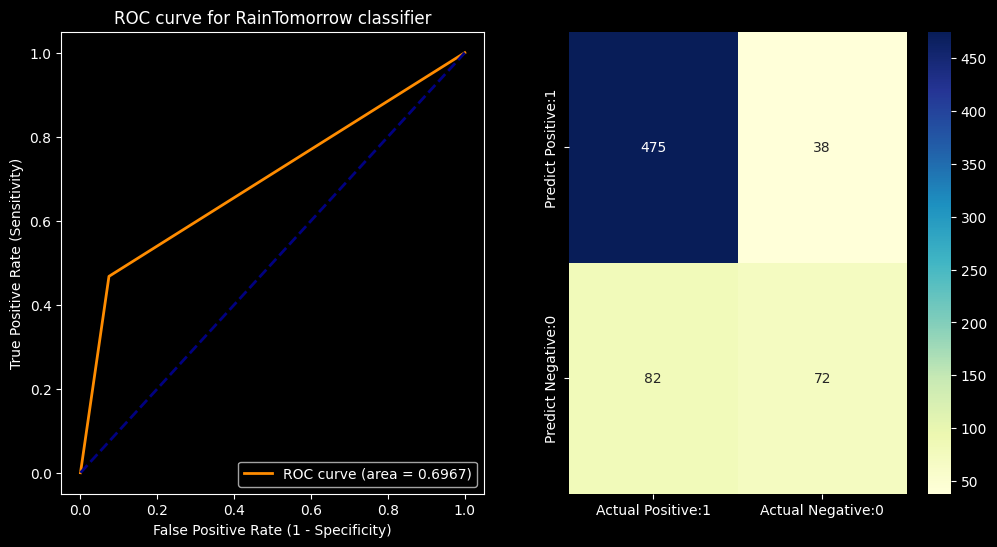

In [147]:
# plot ROC Curve
prob = optimised_KNN.predict(x_test_s)
fper, tper, _ = roc_curve(y_test, prob)
auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_knn_op = confusion_matrix(y_test, optimised_KNN.predict(x_test_s))
cm_matrix_knnOP = pd.DataFrame(data=cm_knn_op, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_knnOP, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

In [148]:
# Trainng data 
acc_train_knnop = accuracy_score(y_train, optimised_KNN.predict(x_train_s))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_knnop)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_knnop = optimised_KNN.predict(x_test_s)

acc_knnop = accuracy_score(y_test, y_pred_knnop)
f1_knnop = f1_score(y_test, y_pred_knnop, average='weighted')
roc_knnop = roc_auc_score(y_test, y_pred_knnop)

print('Accuracy: ', acc_knnop,'\nF1 Score: ', f1_knnop, '\nAUC(ROC): ', roc_knnop)
print("Classification Report: ")
print(classification_report(y_test, y_pred_knnop))

Training Data Metrics:
Accuracy:  0.8404654654654654

Testing Data Metrics:
Accuracy:  0.8200899550224887 
F1 Score:  0.8087965363112836 
AUC(ROC):  0.6967291967291966
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       513
           1       0.65      0.47      0.55       154

    accuracy                           0.82       667
   macro avg       0.75      0.70      0.72       667
weighted avg       0.81      0.82      0.81       667



# Model4-DecisionTreeClassifier

In [149]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

# Plotting Decision Tree

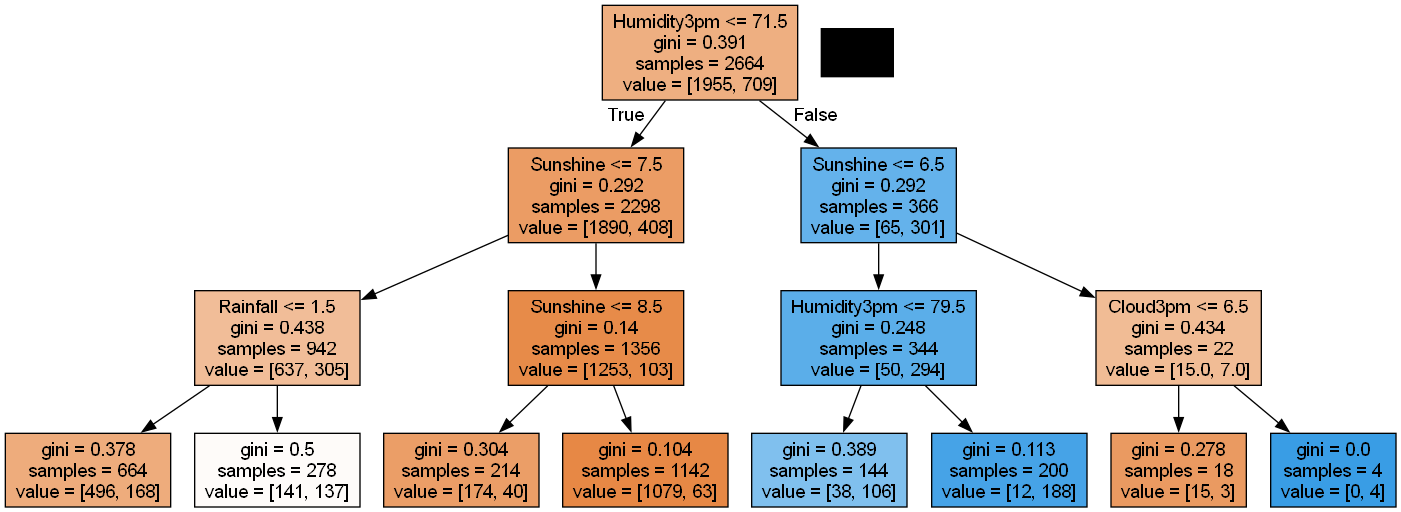

In [150]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Model Performance

In [151]:
# Trainng data 
acc_train_clftree = accuracy_score(y_train, clftree.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_clftree)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_clftree = clftree.predict(x_test)

acc_clftree = accuracy_score(y_test, y_pred_clftree)
f1_clftree = f1_score(y_test, y_pred_clftree, average='weighted')
roc_clftree = roc_auc_score(y_test, y_pred_clftree)

print('Accuracy: ', acc_clftree,'\nF1 Score: ', f1_clftree, '\nAUC(ROC): ', roc_clftree)
print("Classification Report: ")
print(classification_report(y_test, y_pred_clftree))

Training Data Metrics:
Accuracy:  0.8269519519519519

Testing Data Metrics:
Accuracy:  0.8170914542728636 
F1 Score:  0.7897169658414036 
AUC(ROC):  0.6470658970658971
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       513
           1       0.73      0.33      0.46       154

    accuracy                           0.82       667
   macro avg       0.78      0.65      0.67       667
weighted avg       0.80      0.82      0.79       667



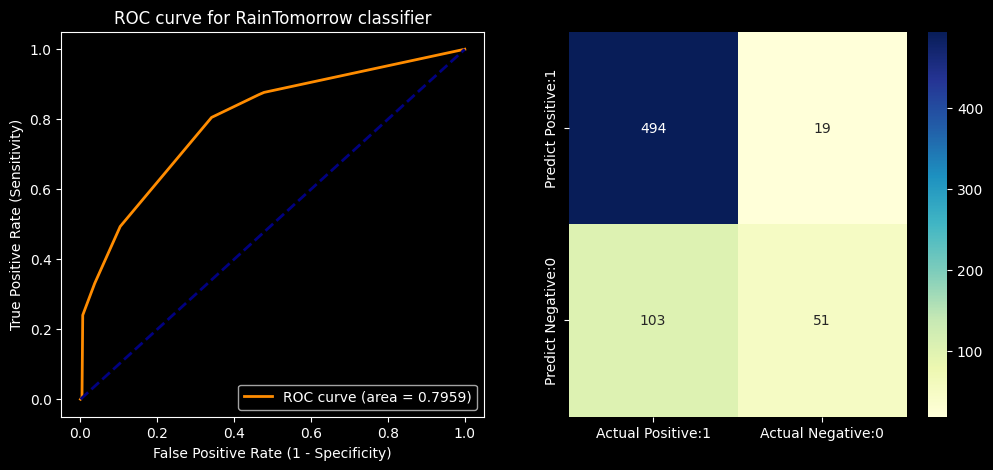

In [152]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_clftree01 = (clftree.predict_proba(x_test)[:,1])
y_pred_clftree01 = y_pred_clftree01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_clftree01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_clftree = confusion_matrix(y_test, clftree.predict(x_test))
cm_matrix_clftree = pd.DataFrame(data=cm_clftree, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_clftree, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

# Controlling Tree Growth

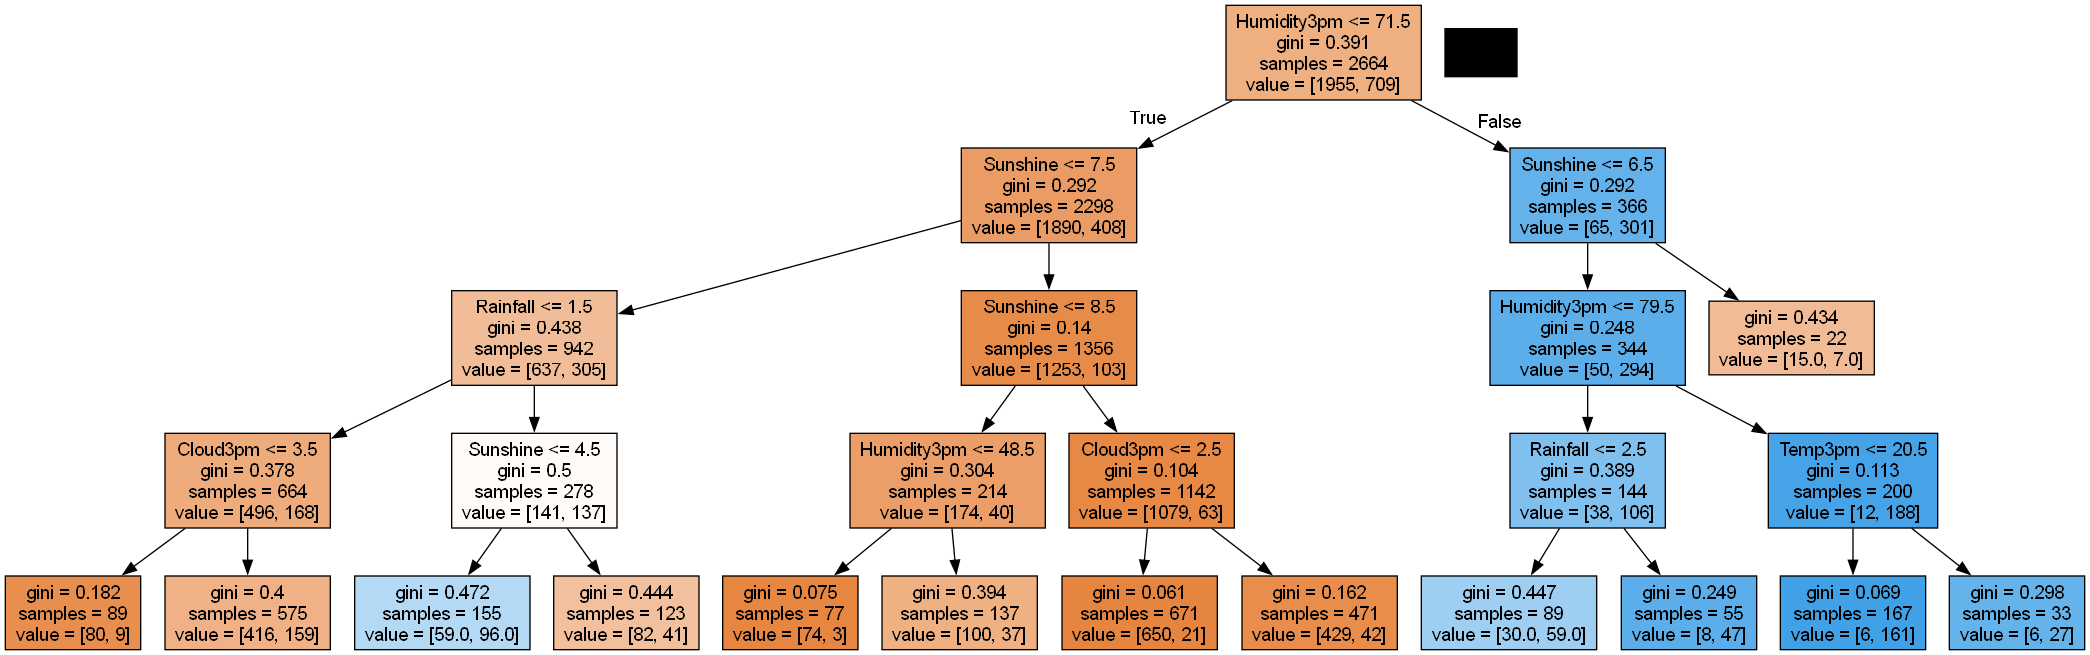

In [153]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(x_train, y_train)
dot_data1 = tree.export_graphviz(clftree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data1)
Image(graph2.create_png())

# Model Performance after Controlling the tree growth

In [154]:
# Trainng data 
acc_train_clftree2 = accuracy_score(y_train, clftree2.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_clftree2)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_clftree2 = clftree2.predict(x_test)

acc_clftree2 = accuracy_score(y_test, y_pred_clftree2)
f1_clftree2 = f1_score(y_test, y_pred_clftree2, average='weighted')
roc_clftree2 = roc_auc_score(y_test, y_pred_clftree2)

print('Accuracy: ', acc_clftree2,'\nF1 Score: ', f1_clftree2, '\nAUC(ROC): ', roc_clftree2)
print("Classification Report: ")
print(classification_report(y_test, y_pred_clftree2))

Training Data Metrics:
Accuracy:  0.8393393393393394

Testing Data Metrics:
Accuracy:  0.823088455772114 
F1 Score:  0.8080097351201171 
AUC(ROC):  0.6873180425812004
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       513
           1       0.68      0.44      0.53       154

    accuracy                           0.82       667
   macro avg       0.77      0.69      0.71       667
weighted avg       0.81      0.82      0.81       667



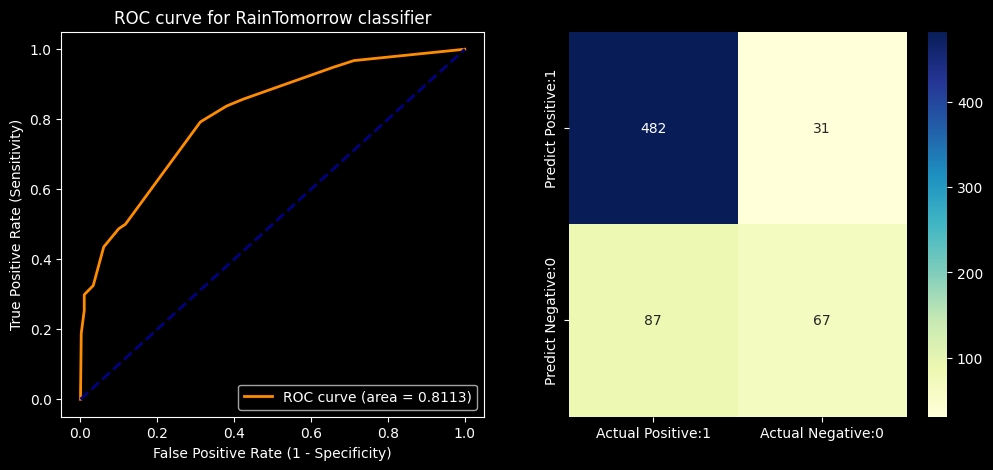

In [155]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_clftree201 = (clftree2.predict_proba(x_test)[:,1])
y_pred_clftree201 = y_pred_clftree201.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_clftree201, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_clftree2 = confusion_matrix(y_test, clftree2.predict(x_test))
cm_matrix_clftree2 = pd.DataFrame(data=cm_clftree2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_clftree2, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

# Bagging

In [156]:
clftree3 = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(estimator=clftree3, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)
bag_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

# Model Performance after Bagging

In [157]:
# Trainng data 
acc_train_bag = accuracy_score(y_train, bag_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_bag)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_bag = bag_clf.predict(x_test)

acc_bag = accuracy_score(y_test, y_pred_bag)
f1_bag = f1_score(y_test, y_pred_bag, average='weighted')
roc_bag = roc_auc_score(y_test, y_pred_bag)

print('Accuracy: ', acc_bag,'\nF1 Score: ', f1_bag, '\nAUC(ROC): ', roc_bag)
print("Classification Report: ")
print(classification_report(y_test, y_pred_bag))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.8140929535232384 
F1 Score:  0.806127182155614 
AUC(ROC):  0.7019189387610439
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       513
           1       0.62      0.49      0.55       154

    accuracy                           0.81       667
   macro avg       0.74      0.70      0.72       667
weighted avg       0.80      0.81      0.81       667



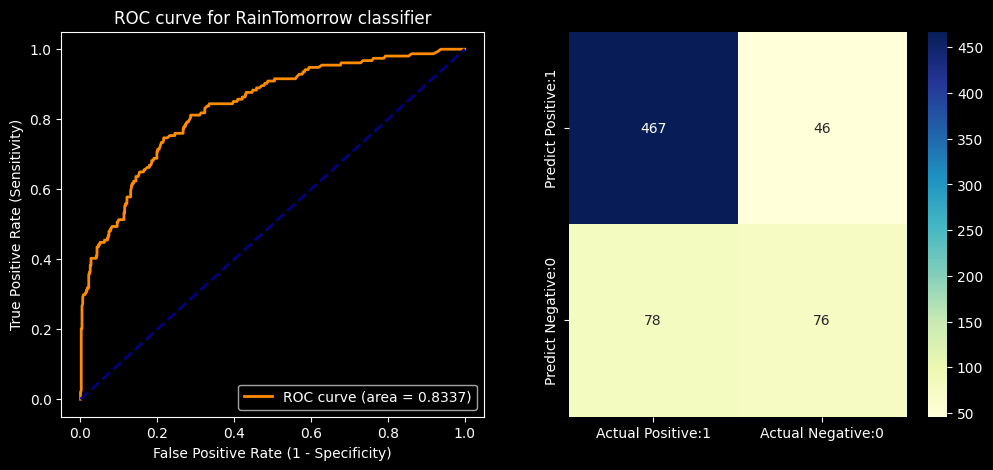

In [158]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_bag01 = (bag_clf.predict_proba(x_test)[:,1])
y_pred_bag01 = y_pred_bag01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_bag01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_bag_clf = confusion_matrix(y_test, bag_clf.predict(x_test))
cm_matrix_bag_clf = pd.DataFrame(data=cm_bag_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_bag_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

# Model_5: Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

# Model Performance

In [160]:
# Trainng data 
acc_train_rfclf = accuracy_score(y_train, rf_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_rfclf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_rfclf = rf_clf.predict(x_test)

acc_rfclf = accuracy_score(y_test, y_pred_rfclf)
f1_rfclf = f1_score(y_test, y_pred_rfclf, average='weighted')
roc_rfclf = roc_auc_score(y_test, y_pred_rfclf)

print('Accuracy: ', acc_rfclf,'\nF1 Score: ', f1_rfclf, '\nAUC(ROC): ', roc_rfclf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_rfclf))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.823088455772114 
F1 Score:  0.8143795749184233 
AUC(ROC):  0.7100389863547758
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       513
           1       0.65      0.50      0.57       154

    accuracy                           0.82       667
   macro avg       0.76      0.71      0.73       667
weighted avg       0.81      0.82      0.81       667



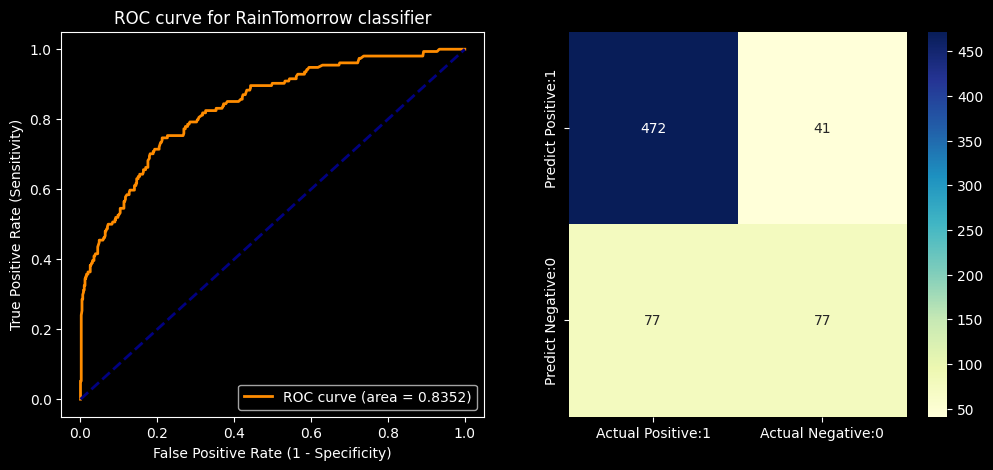

In [164]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_rfclf01 = (rf_clf.predict_proba(x_test)[:,1])
y_pred_rfclf01 = y_pred_rfclf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_rfclf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_rfclf = confusion_matrix(y_test, rf_clf.predict(x_test))
cm_matrix_rfclf = pd.DataFrame(data=cm_rfclf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_rfclf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

# Grid Search

In [165]:
from sklearn.model_selection import GridSearchCV
rf_clf_grid = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 6, 10],}
grid_search = GridSearchCV(rf_clf_grid, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 6, 10]},
             scoring='accuracy')

In [79]:
grid_search.best_params_
cvrf_clf = grid_search.best_estimator_

# Model Performance After Grid Search

In [82]:
# Trainng data 
acc_train_cvrf_clf = accuracy_score(y_train, cvrf_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_cvrf_clf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_cvrf_clf = cvrf_clf.predict(x_test)

acc_cvrf_clf = accuracy_score(y_test, y_pred_cvrf_clf)
f1_cvrf_clf = f1_score(y_test, y_pred_cvrf_clf, average='weighted')
roc_cvrf_clf = roc_auc_score(y_test, y_pred_cvrf_clf)

print('Accuracy: ', acc_cvrf_clf,'\nF1 Score: ', f1_cvrf_clf, '\nAUC(ROC): ', roc_cvrf_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_cvrf_clf))

Training Data Metrics:
Accuracy:  0.9414414414414415

Testing Data Metrics:
Accuracy:  0.8215892053973014 
F1 Score:  0.8130953011133091 
AUC(ROC):  0.7090643274853802
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       513
           1       0.65      0.50      0.56       154

    accuracy                           0.82       667
   macro avg       0.75      0.71      0.73       667
weighted avg       0.81      0.82      0.81       667



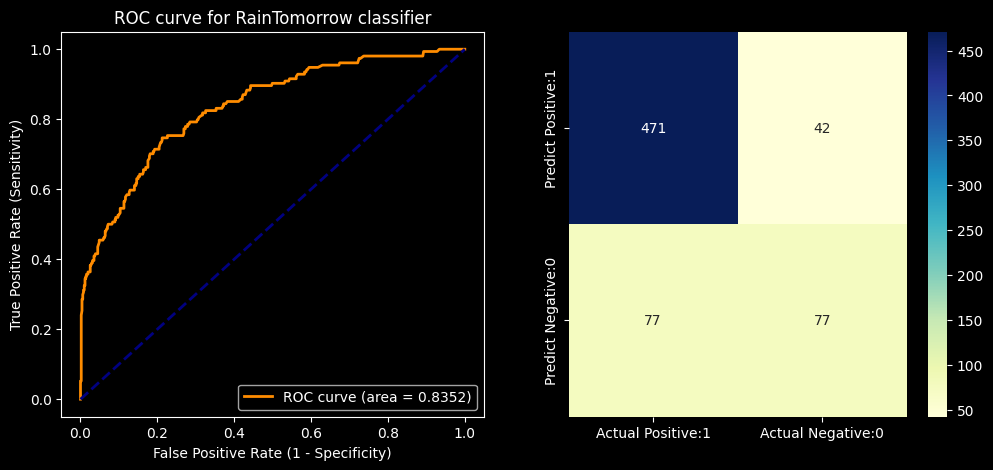

In [83]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_cvrf_clf01 = (cvrf_clf.predict_proba(x_test)[:,1])
y_pred_cvrf_clf01 = y_pred_rfclf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_cvrf_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_cvrf_clf = confusion_matrix(y_test, cvrf_clf.predict(x_test))
cm_matrix_cvrf_clf = pd.DataFrame(data=cm_cvrf_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_cvrf_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

# Model_6: Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=1000,
                                     max_features=6,
                                     min_samples_split=2,
                                     random_state=42)
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier(max_features=6, n_estimators=1000, random_state=42)

# Model Performance

In [85]:
# Trainng data 
acc_train_gbc_clf = accuracy_score(y_train, gbc_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_gbc_clf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_gbc_clf = gbc_clf.predict(x_test)

acc_gbc_clf = accuracy_score(y_test, y_pred_gbc_clf)
f1_gbc_clf = f1_score(y_test, y_pred_gbc_clf, average='weighted')
roc_gbc_clf = roc_auc_score(y_test, y_pred_gbc_clf)

print('Accuracy: ', acc_gbc_clf,'\nF1 Score: ', f1_gbc_clf, '\nAUC(ROC): ', roc_gbc_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_gbc_clf))

Training Data Metrics:
Accuracy:  0.9763513513513513

Testing Data Metrics:
Accuracy:  0.8335832083958021 
F1 Score:  0.8282119106601766 
AUC(ROC):  0.7373104478367638
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       513
           1       0.67      0.56      0.61       154

    accuracy                           0.83       667
   macro avg       0.77      0.74      0.75       667
weighted avg       0.83      0.83      0.83       667



<Axes: >

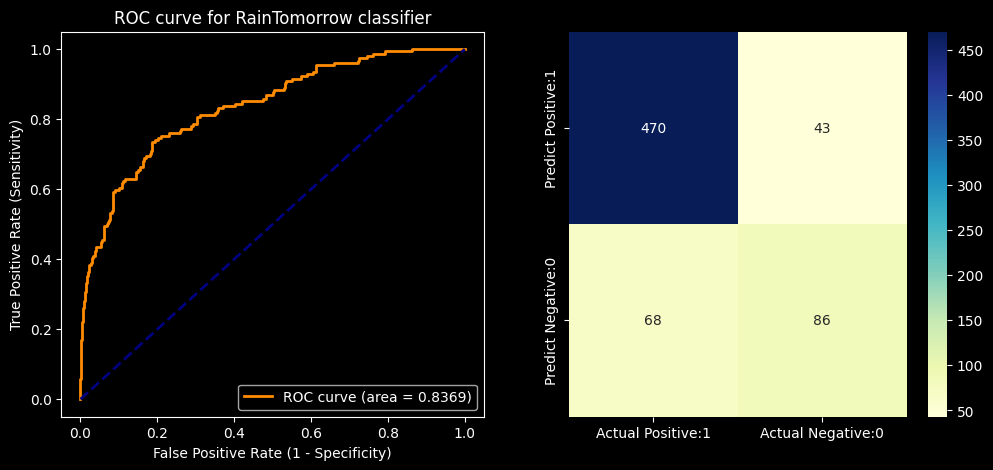

In [86]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_gbc_clf01 = (gbc_clf.predict_proba(x_test)[:,1])
y_pred_gbc_clf01 = y_pred_gbc_clf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_gbc_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_gbc_clf = confusion_matrix(y_test, gbc_clf.predict(x_test))
cm_matrix_gbc_clf = pd.DataFrame(data=cm_gbc_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_gbc_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

# Using Diff Parameter

In [87]:
gbc_clf2 = GradientBoostingClassifier(learning_rate=0.02,
                                     n_estimators=1000,
                                     max_depth=1,)
gbc_clf2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

# Model Performance After Using Diff Parameter

In [88]:
acc_train_gbc_clf2 = accuracy_score(y_train, gbc_clf2.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_gbc_clf2)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_gbc_clf2 = gbc_clf2.predict(x_test)

acc_gbc_clf2 = accuracy_score(y_test, y_pred_gbc_clf2)
f1_gbc_clf2 = f1_score(y_test, y_pred_gbc_clf2, average='weighted')
roc_gbc_clf2 = roc_auc_score(y_test, y_pred_gbc_clf2)

print('Accuracy: ', acc_gbc_clf2,'\nF1 Score: ', f1_gbc_clf2, '\nAUC(ROC): ', roc_gbc_clf2)
print("Classification Report: ")
print(classification_report(y_test, y_pred_gbc_clf2))

Training Data Metrics:
Accuracy:  0.8427177177177178

Testing Data Metrics:
Accuracy:  0.8275862068965517 
F1 Score:  0.8152062246689351 
AUC(ROC):  0.7016024910761752
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       513
           1       0.69      0.47      0.56       154

    accuracy                           0.83       667
   macro avg       0.77      0.70      0.72       667
weighted avg       0.82      0.83      0.82       667



<Axes: >

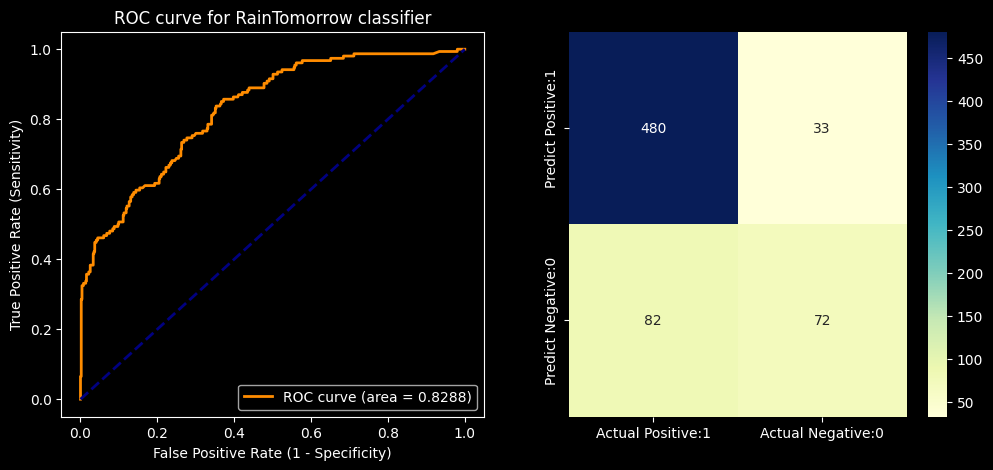

In [89]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_gbc_clf201 = (gbc_clf2.predict_proba(x_test)[:,1])
y_pred_gbc_clf201 = y_pred_gbc_clf201.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_gbc_clf201, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_gbc_clf2 = confusion_matrix(y_test, gbc_clf2.predict(x_test))
cm_matrix_gbc_clf2 = pd.DataFrame(data=cm_gbc_clf2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_gbc_clf2, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

# GB Using Grid Search

In [90]:
gbc_clf_grid = GradientBoostingClassifier(loss='log_loss',
                                          criterion='friedman_mse',
                                          random_state=42)
params_grid_gbc = {"learning_rate": np.arange(0.01,0.11,0.01),
                   "n_estimators" : [500,650,700,850,1000],
                   "max_depth": [1,2,3,4,5],}
grid_search_gbc = GridSearchCV(gbc_clf_grid, params_grid_gbc,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search_gbc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [500, 650, 700, 850, 1000]},
             scoring='accuracy')

In [91]:
grid_search_gbc.best_params_

{'learning_rate': np.float64(0.01), 'max_depth': 4, 'n_estimators': 500}

# Model_7: Ada Boost

In [170]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)
ada_clf.fit(x_train, y_train)

C:\Users\SUHITA SREE KOLLI\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

# Model Performance

In [171]:
# Trainng data 
acc_train_ada_clf = accuracy_score(y_train, ada_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_ada_clf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_ada_clf = ada_clf.predict(x_test)

acc_ada_clf = accuracy_score(y_test, y_pred_ada_clf)
f1_ada_clf = f1_score(y_test, y_pred_ada_clf, average='weighted')
roc_ada_clf = roc_auc_score(y_test, y_pred_ada_clf)

print('Accuracy: ', acc_ada_clf,'\nF1 Score: ', f1_ada_clf, '\nAUC(ROC): ', roc_ada_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_ada_clf))

Training Data Metrics:
Accuracy:  0.8464714714714715

Testing Data Metrics:
Accuracy:  0.8200899550224887 
F1 Score:  0.8094240874831655 
AUC(ROC):  0.6990012911065543
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       513
           1       0.65      0.47      0.55       154

    accuracy                           0.82       667
   macro avg       0.75      0.70      0.72       667
weighted avg       0.81      0.82      0.81       667



<Axes: >

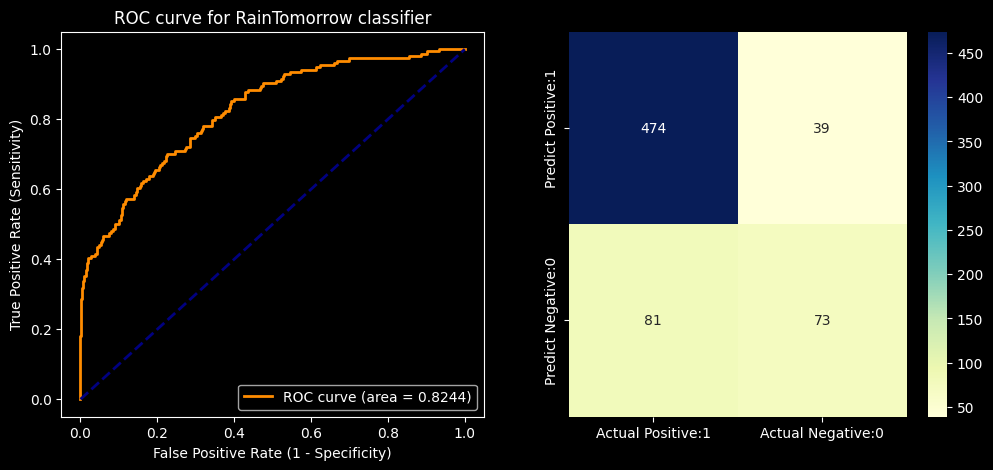

In [172]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_ada_clf01 = (ada_clf.predict_proba(x_test)[:,1])
y_pred_ada_clf01 = y_pred_ada_clf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_ada_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_ada_clf = confusion_matrix(y_test, ada_clf.predict(x_test))
cm_matrix_ada_clf = pd.DataFrame(data=cm_ada_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_ada_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

# Using Diff Parameter

In [173]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)
ada_clf2.fit(x_train, y_train)

C:\Users\SUHITA SREE KOLLI\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                    n_jobs=-1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

# Model Performance after Using diff parameter

In [174]:
# Trainng data 
acc_train_ada_clf2 = accuracy_score(y_train, ada_clf2.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_ada_clf2)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_ada_clf2 = ada_clf2.predict(x_test)

acc_ada_clf2 = accuracy_score(y_test, y_pred_ada_clf2)
f1_ada_clf2 = f1_score(y_test, y_pred_ada_clf2, average='weighted')
roc_ada_clf2 = roc_auc_score(y_test, y_pred_ada_clf2)

print('Accuracy: ', acc_ada_clf2,'\nF1 Score: ', f1_ada_clf2, '\nAUC(ROC): ', roc_ada_clf2)
print("Classification Report: ")
print(classification_report(y_test, y_pred_ada_clf2))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.8245877061469266 
F1 Score:  0.816236556556783 
AUC(ROC):  0.7132857396015291
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       513
           1       0.66      0.51      0.57       154

    accuracy                           0.82       667
   macro avg       0.76      0.71      0.73       667
weighted avg       0.81      0.82      0.82       667



<Axes: >

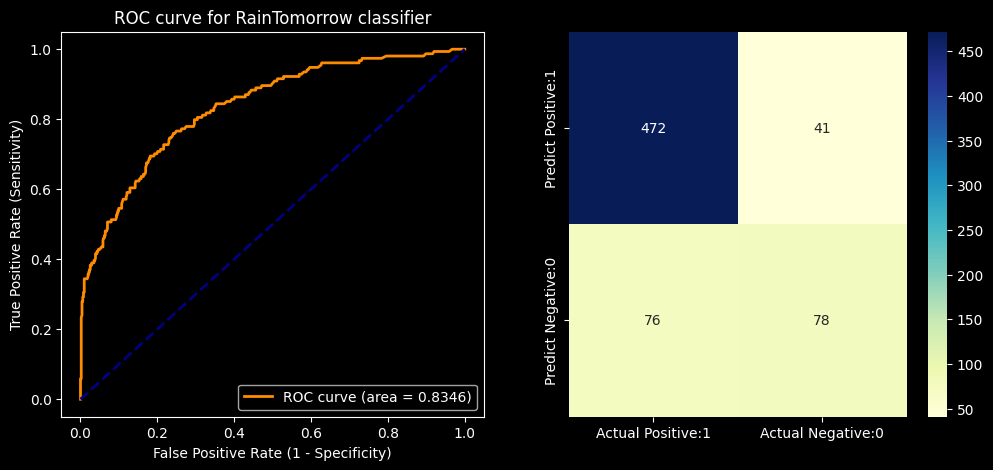

In [175]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_ada_clf201 = (ada_clf2.predict_proba(x_test)[:,1])
y_pred_ada_clf201 = y_pred_ada_clf201.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_ada_clf201, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_ada_clf2 = confusion_matrix(y_test, ada_clf2.predict(x_test))
cm_matrix_ada_clf2 = pd.DataFrame(data=cm_ada_clf2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_ada_clf2, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

# Using grid search

In [192]:
from sklearn.tree import DecisionTreeClassifier
# Define the base estimator
estimator = DecisionTreeClassifier(max_depth=2)  # You can experiment with different depths

# Define the AdaBoost model with the new base estimator
ada_clf_grid = AdaBoostClassifier(estimator=0, random_state=42)

# Reduce the number of estimators
params_grid_ada = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.02, 0.05, 0.1]
}

# Perform grid search
grid_search_ada = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), random_state=42), 
                               params_grid_ada, n_jobs=-1, cv=5, scoring='accuracy')
grid_search_ada.fit(x_train, y_train)

# Get the best model
print('Best Params: ', grid_search_ada.best_params_)
cv_ada_clf = grid_search_ada.best_estimator_

# Training data metrics
acc_train_cv_ada_clf = accuracy_score(y_train, cv_ada_clf.predict(x_train))

print("Training Data Metrics:")
print('Accuracy: ', acc_train_cv_ada_clf)


# Test data metrics
y_test_pred_cv_ada_clf = cv_ada_clf.predict(x_test)
acc_test_cv_ada_clf = accuracy_score(y_test, y_test_pred_cv_ada_clf)
f1_test_cv_ada_clf = f1_score(y_test, y_test_pred_cv_ada_clf, average='weighted')
roc_test_cv_ada_clf = roc_auc_score(y_test, y_test_pred_cv_ada_clf)

print("\nTest Data Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_cv_ada_clf))
print('Accuracy: ', acc_test_cv_ada_clf,'\nF1 Score: ', f1_test_cv_ada_clf,'\nAUC(ROC): ', roc_test_cv_ada_clf)
print("Classification Report:\n", classification_report(y_test, y_test_pred_cv_ada_clf))

C:\Users\SUHITA SREE KOLLI\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Params:  {'learning_rate': 0.05, 'n_estimators': 50}
Training Data Metrics:
Accuracy:  0.8419669669669669

Test Data Metrics:
Confusion Matrix:
 [[490  23]
 [ 89  65]]
Accuracy:  0.8320839580209896 
F1 Score:  0.8142607018169237 
AUC(ROC):  0.6886218070428597
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       513
           1       0.74      0.42      0.54       154

    accuracy                           0.83       667
   macro avg       0.79      0.69      0.72       667
weighted avg       0.82      0.83      0.81       667



In [193]:
# Test data metrics
y_test_pred_cv_ada_clf = cv_ada_clf.predict(x_test)
acc_test_cv_ada_clf = accuracy_score(y_test, y_test_pred_cv_ada_clf)
f1_test_cv_ada_clf = f1_score(y_test, y_test_pred_cv_ada_clf, average='weighted')
roc_test_cv_ada_clf = roc_auc_score(y_test, y_test_pred_cv_ada_clf)

print("\nTest Data Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_cv_ada_clf))
print('Accuracy: ', acc_test_cv_ada_clf,'\nF1 Score: ', f1_test_cv_ada_clf,'\nAUC(ROC): ', roc_test_cv_ada_clf)
print("Classification Report:\n", classification_report(y_test, y_test_pred_cv_ada_clf))


Test Data Metrics:
Confusion Matrix:
 [[490  23]
 [ 89  65]]
Accuracy:  0.8320839580209896 
F1 Score:  0.8142607018169237 
AUC(ROC):  0.6886218070428597
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       513
           1       0.74      0.42      0.54       154

    accuracy                           0.83       667
   macro avg       0.79      0.69      0.72       667
weighted avg       0.82      0.83      0.81       667



<Axes: >

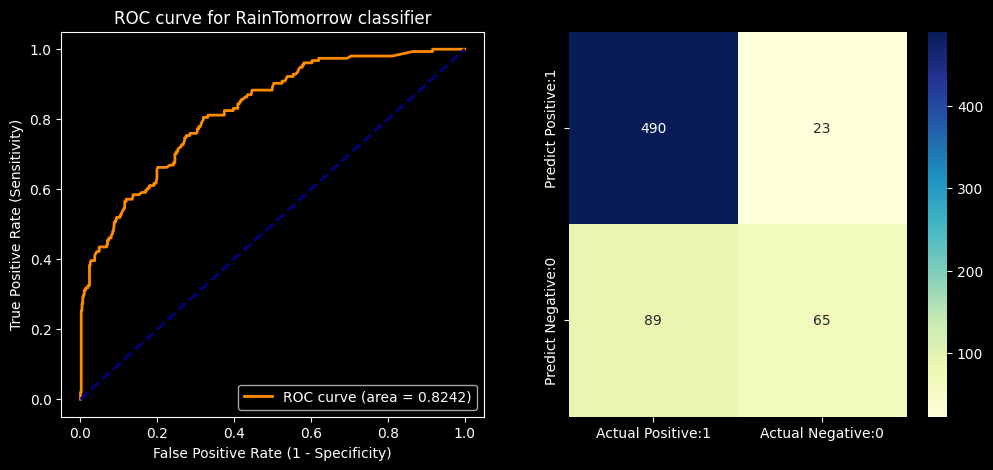

In [194]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_ada_clf201 = (cv_ada_clf.predict_proba(x_test)[:,1])
y_pred_ada_clf201 = y_pred_ada_clf201.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_ada_clf201, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_ada_clf2 = confusion_matrix(y_test,cv_ada_clf.predict(x_test))
cm_matrix_ada_clf2 = pd.DataFrame(data=cm_ada_clf2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_ada_clf2, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

# Model_08: XG Boost

In [195]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1, random_state=42)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

# Plot importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

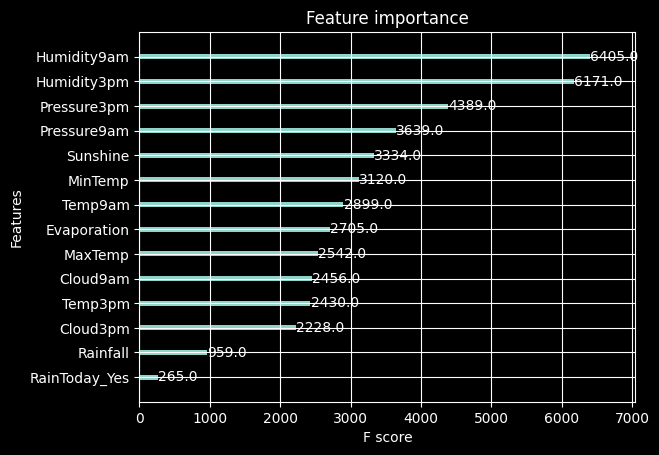

In [199]:
import xgboost
xgb.plot_importance(xgb_clf)

# Model Performance

In [200]:
# Trainng data 
acc_train_xgb_clf = accuracy_score(y_train, xgb_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_xgb_clf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_xgb_clf = xgb_clf.predict(x_test)

acc_xgb_clf = accuracy_score(y_test, y_pred_xgb_clf)
f1_xgb_clf = f1_score(y_test, y_pred_xgb_clf, average='weighted')
roc_xgb_clf = roc_auc_score(y_test, y_pred_xgb_clf)

print('Accuracy: ', acc_xgb_clf,'\nF1 Score: ', f1_xgb_clf, '\nAUC(ROC): ', roc_xgb_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb_clf))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.8185907046476761 
F1 Score:  0.815254105398049 
AUC(ROC):  0.7275638591428065
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       513
           1       0.62      0.56      0.59       154

    accuracy                           0.82       667
   macro avg       0.74      0.73      0.74       667
weighted avg       0.81      0.82      0.82       667



<Axes: >

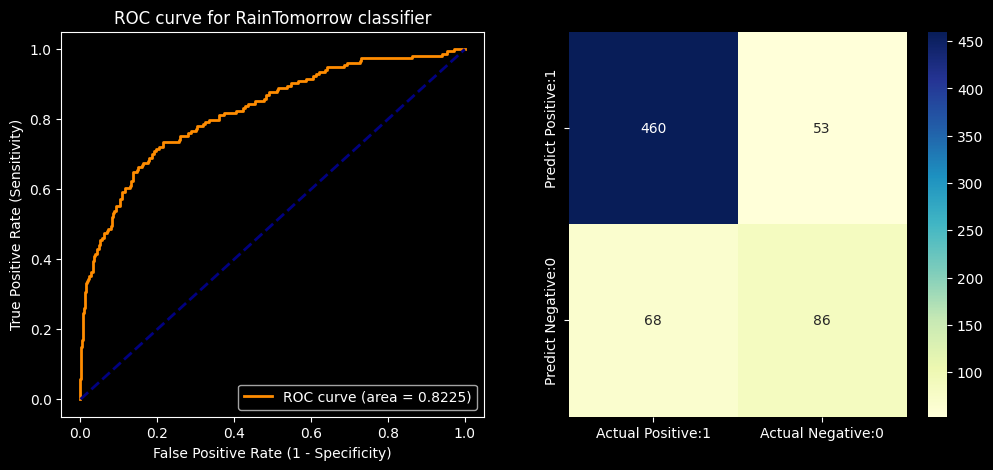

In [201]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_xgb_clf01 = (xgb_clf.predict_proba(x_test)[:,1])
y_pred_xgb_clf01 = y_pred_xgb_clf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_xgb_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_xgb_clf = confusion_matrix(y_test, xgb_clf.predict(x_test))
cm_matrix_xgb_clf = pd.DataFrame(data=cm_xgb_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_xgb_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

# XGB using Grid Search

In [203]:
xgb_clf1 = xgb.XGBClassifier(n_estimators=2500,learning_rate=0.1,
                             random_state=42)
param_test_xgb = {
    'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
     }
grid_search_xgb = GridSearchCV(xgb_clf1, param_test_xgb,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=2500,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [204]:
grid_search_xgb.best_estimator_
cvxgb_clf = grid_search_xgb.best_estimator_

# Model Performance after grid search

In [205]:
# Training data metrics
acc_train_cvxgb_clf = accuracy_score(y_train, cvxgb_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_cvxgb_clf)

# Test data metrics
print("\nTesting Data Metrics:")
y_pred_cvxgb_clf = cvxgb_clf.predict(x_test)

acc_cvxgb_clf = accuracy_score(y_test, y_pred_cvxgb_clf)
f1_cvxgb_clf = f1_score(y_test, y_pred_cvxgb_clf, average='weighted')
roc_cvxgb_clf = roc_auc_score(y_test, y_pred_cvxgb_clf)

print('Accuracy: ', acc_cvxgb_clf,'\nF1 Score: ', f1_cvxgb_clf, '\nAUC(ROC): ', roc_cvxgb_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_cvxgb_clf))

Training Data Metrics:
Accuracy:  0.9876126126126126

Testing Data Metrics:
Accuracy:  0.8215892053973014 
F1 Score:  0.8142221714351422 
AUC(ROC):  0.7136085162400951
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       513
           1       0.64      0.51      0.57       154

    accuracy                           0.82       667
   macro avg       0.75      0.71      0.73       667
weighted avg       0.81      0.82      0.81       667



<Axes: >

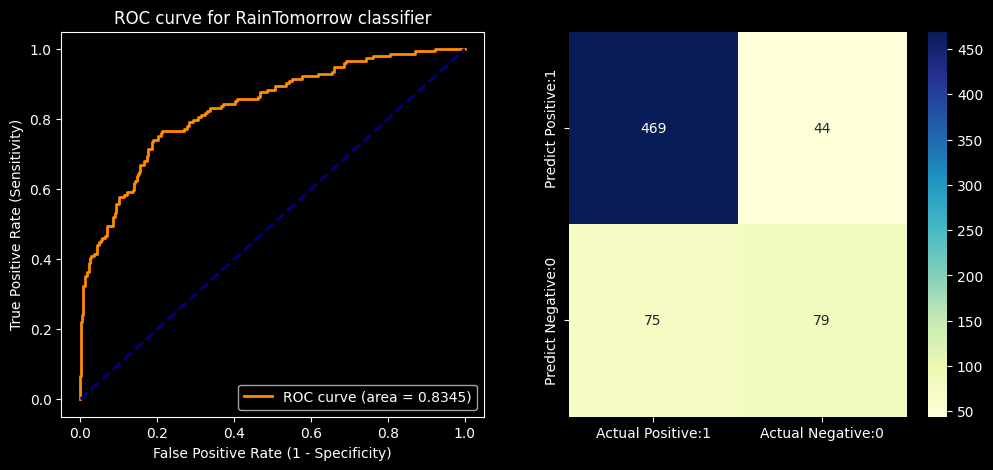

In [206]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_cvxgb_clf01 = (cvxgb_clf.predict_proba(x_test)[:,1])
y_pred_cvxgb_clf01 = y_pred_cvxgb_clf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_cvxgb_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_cvxgb_clf = confusion_matrix(y_test, cvxgb_clf.predict(x_test))
cm_matrix_cvxgb_clf = pd.DataFrame(data=cm_cvxgb_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_cvxgb_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

# Additional Question Answer

1. Your views about the problem statement?
The problem statement is to create a machine learning model that accurately predicts rainfall in Sydney. This involves analyzing historical weather data, which includes factors like temperature, humidity, pressure, sunshine, and cloud cover, to predict if there will be rain the next day. Rainfall prediction is crucial for various purposes, such as:

Planning outdoor activities: People can make informed decisions about scheduling picnics, sporting events, or other outdoor activities based on the predicted chance of rain.
Managing water resources: Accurate rainfall forecasts help water management authorities regulate water usage, optimize reservoir levels, and prepare for potential droughts or floods.
Mitigating flood risks: Early warnings of heavy rainfall allow communities to take necessary precautions to protect themselves from potential flooding, such as preparing sandbags, clearing drainage ditches, and evacuating at-risk areas. An accurate rainfall prediction model can benefit individuals, businesses, and government agencies in Sydney by enabling them to make informed decisions based on the weather forecast. This can lead to increased productivity, reduced economic losses, and improved public safety.
2. What will be your approach to solving this task?
The approach to solving this task can be broken down into several key steps:

Data Acquisition and Preprocessing:
Begin by collecting the weather data for Sydney from 2008 to 2017. This data might be available from public weather databases or government agencies.
Once obtained, the data needs to be cleaned and preprocessed. This may involve handling missing values, identifying and correcting inconsistencies, and potentially converting categorical variables into numerical representations suitable for machine learning models.
Exploratory Data Analysis (EDA):

After preprocessing, it's important to perform exploratory data analysis (EDA) to understand the characteristics of the data. This might involve visualizing the relationships between different weather features and rainfall, identifying potential outliers, and calculating summary statistics. EDA helps in understanding the data's distribution and potential biases.
Model Selection and Training:

Based on the problem of predicting binary outcomes (rain or no rain), classification machine learning models are suitable candidates.
Choose a variety of models, such as decision trees, random forest, gradient boosting, or other options explored in the provided results. It's often beneficial to experiment with several models to identify the one that performs best on this specific dataset.
Split the preprocessed data into training and testing sets. The training set is used to train the models, and the testing set is used to evaluate their performance on unseen data. Train each model on the training set.
Model Evaluation:
Once trained, evaluate the performance of each model on the testing set. Common metrics for classification tasks include accuracy, F1 score, and ROC AUC. Accuracy measures the overall correctness of the predictions, while F1 score considers both precision and recall. ROC AUC represents the model's ability to distinguish between positive and negative cases (rain vs. no rain).
Compare the evaluation metrics of all the models to determine the one that achieves the best performance on the testing data.
Analysis of the Best Model:

After identifying the best performing model, it's crucial to analyze its behavior and understand why it outperformed the others. This might involve examining the feature importances learned by the model to identify the weather factors that have the most significant influence on rainfall prediction.

3. What were the available ML model options you had to perform this task?
The text mentions several machine learning models suitable for classification tasks:

Decision Tree Classifiers
Ensemble Methods:
Random Forest Classifier
Bagging (using Decision Trees)
Boosting (using Gradient Boosting)
Other options used in the provided results include Logistic Regression, LDA, KNN (k-Nearest Neighbors), and XGBoost.

4. Which model’s performance is best and what could be the possible reason for that?
Based on the results table, the Gradient Boosting_Grid model has the highest accuracy (0.8366) among the provided models.

Gradient Boosting is an ensemble technique that sequentially builds decision trees, with each tree focusing on improving the predictions of the previous one.
This sequential approach allows the model to learn more complex relationships between the weather features and rainfall compared to a single decision tree.
Additionally, the 'Grid' in the model name likely refers to using GridSearchCV, a technique that explores a combination of hyperparameter values to find the optimal configuration for the model. This hyperparameter tuning process can further enhance the model's performance by selecting the settings that best suit the specific dataset.

5. What steps can you take to improve this selected model’s performance even further?
Here are some ways to potentially improve the Gradient Boosting model's performance:

Hyperparameter Tuning: Further tune the hyperparameters of the Gradient Boosting model (e.g., learning rate, number of trees) to optimize its performance.
Feature Engineering: Create new features from existing ones that might better capture the relationship between weather factors and rainfall. Data Augmentation: If possible, consider using data augmentation techniques to artificially increase the size and diversity of the training data.
Try Different Ensemble Methods: Explore other ensemble methods like AdaBoost or XGBoost alongside different hyperparameter configurations.
Consider Alternative Models: While Gradient Boosting performs well here, investigate how deep learning models like recurrent neural networks (RNNs) might handle the sequential nature of weather data.
Note: The provided results table only shows a limited set of models. It's possible that other models or configurations might achieve even better performance.